In [1]:
# pip install gradio tensorflow mlflow keras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_csv("C:\\Users\\Nishar Ansari\\Desktop\\datasets gracy ml\\heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h1> Feed- Forward Neural Network (FNN)

In [26]:
from keras.models import Sequential
from keras.layers import Dense

# Define the FNN model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50


C:\Users\Nishar Ansari\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4751 - loss: 8.3220 - val_accuracy: 0.5488 - val_loss: 0.7557
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6333 - loss: 0.7279 - val_accuracy: 0.6098 - val_loss: 0.6827
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7256 - loss: 0.6818 - val_accuracy: 0.6402 - val_loss: 0.6521
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7297 - loss: 0.5468 - val_accuracy: 0.6220 - val_loss: 0.6496
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7540 - loss: 0.5579 - val_accuracy: 0.6463 - val_loss: 0.6306
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7566 - loss: 0.5206 - val_accuracy: 0.6463 - val_loss: 0.6149
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7188 - loss: 0.5604 - val_accuracy: 0.6585 - val_loss: 0.6295
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7812 - loss: 0.4735 - val_accuracy: 0.6707 - val_loss: 0.6107
Ep

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8087 - loss: 0.5067 
Test Loss: 0.5441602468490601, Test Accuracy: 0.785365879535675


<h2> Logistic Regression

Logistic Regression Accuracy: 0.7951
Logistic Regression AUC: 0.8787
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



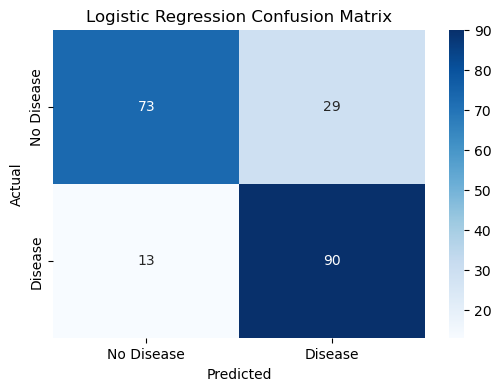

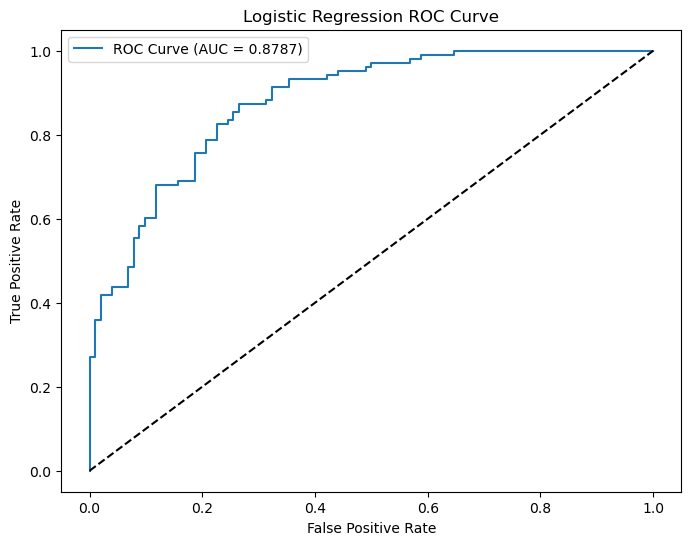

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
cm = confusion_matrix(y_test, y_pred)

print("Logistic Regression Accuracy: {:.4f}".format(accuracy))
print("Logistic Regression AUC: {:.4f}".format(auc))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.4f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

<h2> Decision Tree

Decision Tree Accuracy: 0.9854
Decision Tree AUC: 0.9854
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



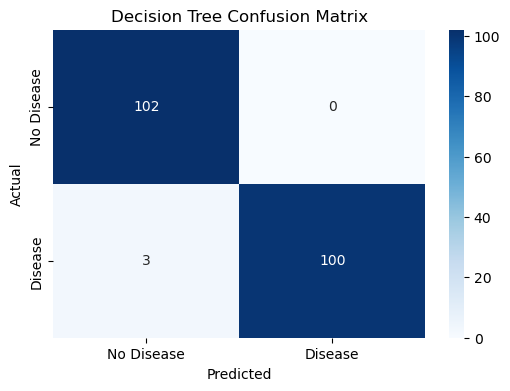

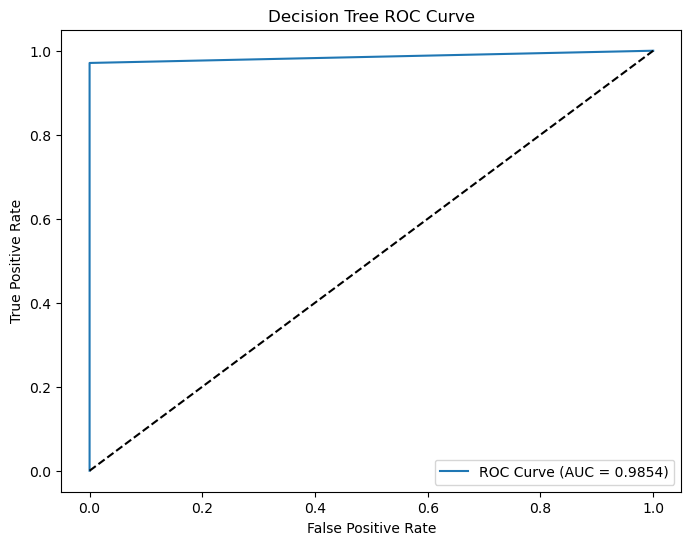

In [9]:
from sklearn.tree import DecisionTreeClassifier  

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
cm = confusion_matrix(y_test, y_pred)

print("Decision Tree Accuracy: {:.4f}".format(accuracy))
print("Decision Tree AUC: {:.4f}".format(auc))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.4f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('Decision Tree ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


<h2> Random Forest Classifier

Random Forest Accuracy: 0.9854
Random Forest AUC: 1.0000
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



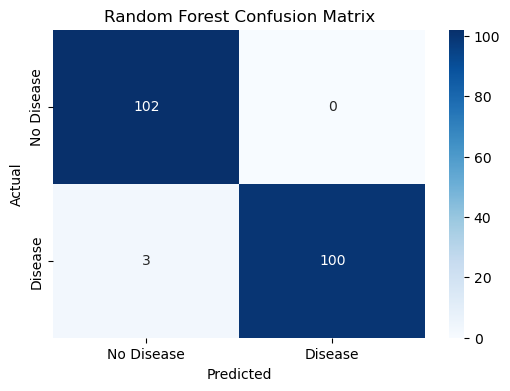

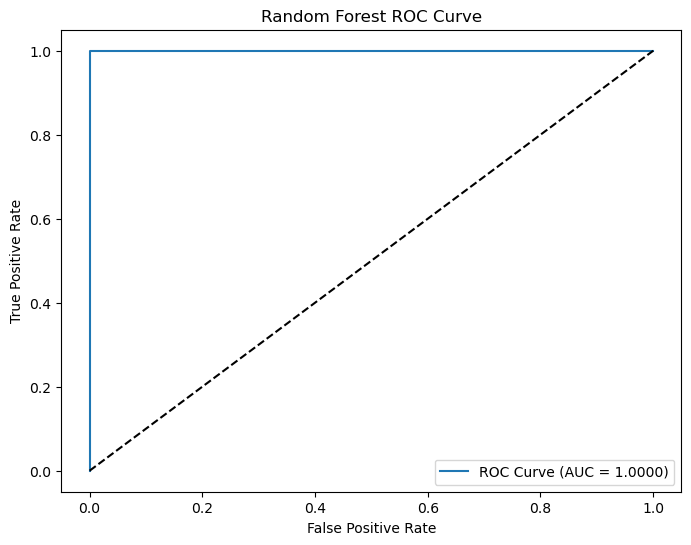

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
cm = confusion_matrix(y_test, y_pred)

print("Random Forest Accuracy: {:.4f}".format(accuracy))
print("Random Forest AUC: {:.4f}".format(auc))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.4f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


<h2> Support Vector Machine (SVM)

SVM Accuracy: 0.8878
SVM AUC: 0.9632
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



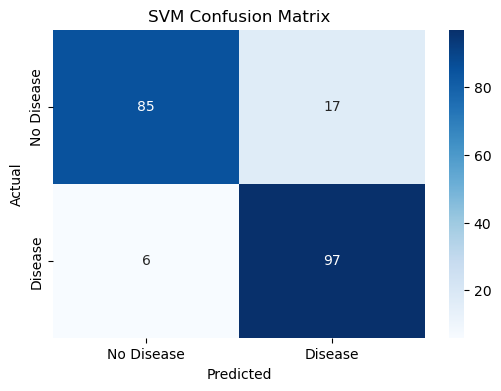

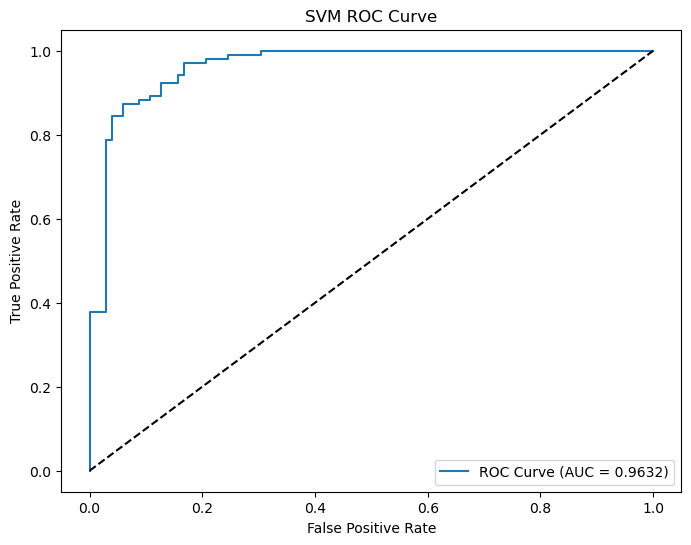

In [11]:
from sklearn.svm import SVC

# Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
cm = confusion_matrix(y_test, y_pred)

print("SVM Accuracy: {:.4f}".format(accuracy))
print("SVM AUC: {:.4f}".format(auc))
print("SVM Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.4f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('SVM ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

<h2> XG Boost

C:\Users\Nishar Ansari\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9854
XGBoost AUC: 0.9894
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



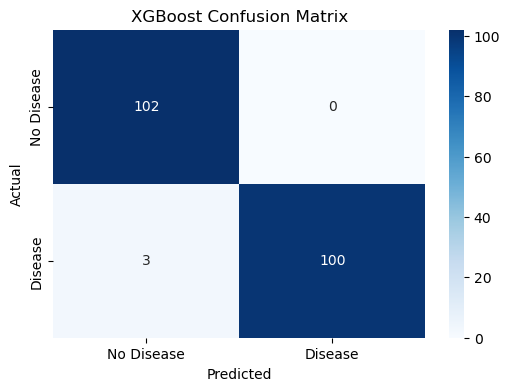

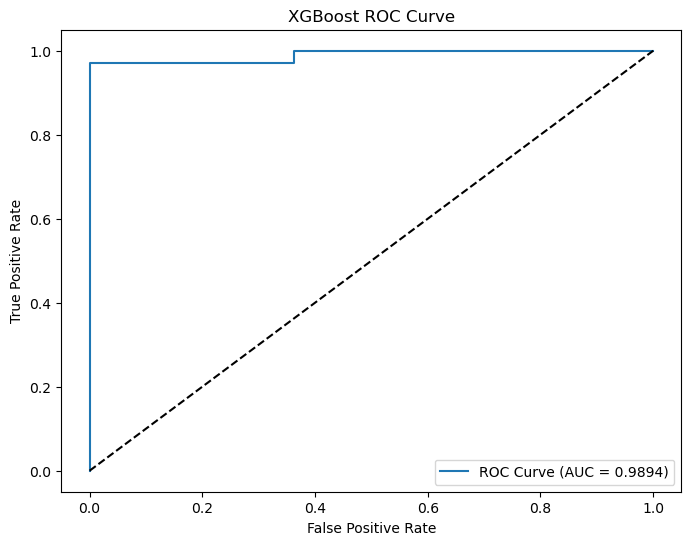

In [12]:
from xgboost import XGBClassifier
import xgboost as xgb

# XGBoost
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, xgboost.predict_proba(X_test)[:, 1])
cm = confusion_matrix(y_test, y_pred)

print("XGBoost Accuracy: {:.4f}".format(accuracy))
print("XGBoost AUC: {:.4f}".format(auc))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, xgboost.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.4f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title('XGBoost ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


<h2> Comparing each Model's Accuracy and finding the best one

In [13]:
model_accuracies = {
    "Feed-Forward Neural Network": accuracy,
    "Logistic Regression": accuracy_score(y_test, y_pred),
    "Random Forest": accuracy_score(y_test, y_pred),
    "SVM": accuracy_score(y_test, y_pred),
    "XGBoost": accuracy_score(y_test, y_pred)
}

for model, accuracy in model_accuracies.items():
    print(f"{model} Accuracy: {accuracy:.4f}")

# find the best model based on accuracy
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nBest Model: {best_model} with Accuracy: {model_accuracies[best_model]:.4f}")

Feed-Forward Neural Network Accuracy: 0.9854
Logistic Regression Accuracy: 0.9854
Random Forest Accuracy: 0.9854
SVM Accuracy: 0.9854
XGBoost Accuracy: 0.9854

Best Model: Feed-Forward Neural Network with Accuracy: 0.9854


<h2> ML flow

In [14]:
# pip install mlflow

In [16]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Start MLflow run
with mlflow.start_run(run_name="Logistic Regression Model"):
    mlflow.log_param("model_type", "Logistic Regression")
    mlflow.log_metrics({
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    })
    mlflow.sklearn.log_model(logistic_model, "model")

    print(f"Logistic Regression model logged with accuracy: {accuracy}")

print("After running this, open your browser and go to 'http://127.0.0.1:5000' to view the experiment.")


2024/10/22 11:37:28 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2024/10/22 11:37:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10

Logistic Regression model logged with accuracy: 0.7951219512195122
After running this, open your browser and go to 'http://127.0.0.1:5000' to view the experiment.


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Start MLflow run
with mlflow.start_run(run_name="Decision Tree Model"):
    mlflow.log_param("model_type", "Decision Tree")
    mlflow.log_metrics({
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    })
    mlflow.sklearn.log_model(decision_tree_model, "model")

    print(f"Decision Tree model logged with accuracy: {accuracy}")

print("After running this, open your browser and go to 'http://127.0.0.1:5000' to view the experiment.")


2024/10/22 11:38:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/22 11:38:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Decision Tree Model at: http://127.0.0.1:5000/#/experiments/0/runs/1b72013d426a48489c89c55211ec4117.
2024/10/22 11:38:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.


Decision Tree model logged with accuracy: 0.9853658536585366
After running this, open your browser and go to 'http://127.0.0.1:5000' to view the experiment.


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred = random_forest_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Start MLflow run
with mlflow.start_run(run_name="Random Forest Model"):
    mlflow.log_param("model_type", "Random Forest")
    mlflow.log_metrics({
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    })
    mlflow.sklearn.log_model(random_forest_model, "model")

2024/10/22 11:38:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/22 11:38:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest Model at: http://127.0.0.1:5000/#/experiments/0/runs/9240ce44bbe74938a4a7ffd7d2725c5b.
2024/10/22 11:38:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.


In [19]:
from sklearn.svm import SVC

# Support Vector Machine model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Start MLflow run
with mlflow.start_run(run_name="Support Vector Machine Model"):
    mlflow.log_param("model_type", "Support Vector Machine")
    mlflow.log_metrics({
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    })
    mlflow.sklearn.log_model(svm_model, "model")

2024/10/22 11:38:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/22 11:38:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Support Vector Machine Model at: http://127.0.0.1:5000/#/experiments/0/runs/3c1bf95b9518408c9eaef769cf707cd8.
2024/10/22 11:38:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.


In [20]:
import xgboost as xgb

# XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Start MLflow run
with mlflow.start_run(run_name="XGBoost Model"):
    mlflow.log_param("model_type", "XGBoost")
    mlflow.log_metrics({
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    })
    mlflow.sklearn.log_model(xgb_model, "model")

C:\Users\Nishar Ansari\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
2024/10/22 11:38:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/22 11:38:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run XGBoost Model at: http://127.0.0.1:5000/#/experiments/0/runs/7bbd20e175e34169aa8770bb81618e9e.
2024/10/22 11:38:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.


In [21]:
import mlflow
import mlflow.tensorflow
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv("C:\\Users\\Nishar Ansari\\Desktop\\datasets gracy ml\\heart.csv")

# Split your data into features and target
X = data.drop("target", axis=1)
y = data["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Feedforward Neural Network model
ffn_model = Sequential()
ffn_model.add(Input(shape=(X_train.shape[1],)) )  # Input layer
ffn_model.add(Dense(16, activation='relu'))          # Hidden layer 1
ffn_model.add(Dense(8, activation='relu'))           # Hidden layer 2
ffn_model.add(Dense(1, activation='sigmoid'))        # Output layer for binary classification

# Compile the model
ffn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
ffn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Make predictions
y_pred = ffn_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Start MLflow run
with mlflow.start_run():
    # Log model parameters
    mlflow.log_param("model_type", "Feedforward Neural Network")
    
    # Log evaluation metrics
    mlflow.log_metrics({
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    })

    # Log the model
    mlflow.tensorflow.log_model(ffn_model, "model")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


2024/10/22 11:38:57 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
2024/10/22 11:39:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/22 11:39:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run clean-koi-451 at: http://127.0.0.1:5000/#/experiments/0/runs/8cfbb7a2107447f387c91130aae0fc73.
2024/10/22 11:39:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/0.


<h2> Gradio Interface

In [ ]:
# pip install gradio

In [29]:
import gradio as gr

def predict(input_age, input_sex, input_cp, input_trestbps, input_chol, input_fbs,
             input_restecg, input_thalach, input_exang, input_oldpeak, input_slope,
             input_ca, input_thal):

    # Input validation (add checks for other inputs as needed)
    if not (0 <= input_age <= 120):
        return {"error": "Age must be between 0 and 120."}

    # Prepare input data
    input_data = [[input_age, input_sex, input_cp, input_trestbps, input_chol,
                   input_fbs, input_restecg, input_thalach, input_exang,
                   input_oldpeak, input_slope, input_ca, input_thal]]

    input_scaled = scaler.transform(input_data)

    # Predictions
    try:
        predictions = {
            'Logistic Regression': log_reg.predict(input_scaled)[0],
            'Random Forest': rf.predict(input_scaled)[0],
            'Decision Tree': dt.predict(input_scaled)[0],
            'SVM': svm.predict(input_scaled)[0],
            'XGBoost': xgboost.predict(input_scaled)[0],
            'FNN': (model.predict(input_scaled) > 0.5).astype("int32")[0][0]
        }

        for key in predictions:
            predictions[key] = 'Heart Disease' if predictions[key] == 1 else 'No Heart Disease'

        return predictions
    except Exception as e:
        return {"error": str(e)}

# Create Gradio interface
input_components = [
    gr.Number(label='Age'),
    gr.Number(label='Sex'),
    gr.Number(label='Chest Pain Type (cp)'),
    gr.Number(label='Resting Blood Pressure (trestbps)'),
    gr.Number(label='Cholesterol Level (chol)'),
    gr.Number(label='Fasting Blood Sugar (fbs)'),
    gr.Number(label='Resting Electrocardiographic Results (restecg)'),
    gr.Number(label='Maximum Heart Rate Achieved (thalach)'),
    gr.Number(label='Exercise Induced Angina (exang)'),
    gr.Number(label='Old Peak'),
    gr.Number(label='Slope of the Peak Exercise ST Segment (slope)'),
    gr.Number(label='Number of Major Vessels Colored by Fluoroscopy (ca)'),
    gr.Number(label='Thalassemia (thal)'),
]

# Launch the Gradio interface
gr.Interface(fn=predict,
             inputs=input_components,
             outputs='json',
             title='Heart Disease Prediction',
             description='Enter the features to predict the presence of heart disease.').launch()


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


C:\Users\Nishar Ansari\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


In [28]:
print(type(model))  # Should show <class 'keras.engine.sequential.Sequential'>


<class 'keras.src.models.sequential.Sequential'>
